<font color='red'>$\Huge{\textbf{School of Computational Techniques}}$
$\Huge{\textbf{for Physics Students in Kenya}}$

$\Huge{\text{Machine Learning Techniques}}$

Lorenzo Capriotti,
Wanjiku Nganga

# <font color='red'>**Introduction to Machine Learning**


##**Data analysis and visualisation with Python**

In [ ]:
import numpy as np
from matplotlib import pyplot
x = np.linspace(0, 4, 100)
y = np.sin(3*x)
#pyplot.plot(x, y)
#pyplot.show()

#Epoch = 5
#Prediction for 10.000000: 8.588037
#Prediction for 15.000000: 12.607328
#Prediction for 20.000000: 16.626619

#Epoch = 50
#Prediction for 10.000000: 31.228233
#Prediction for 15.000000: 46.408569
#Prediction for 20.000000: 61.588905

#Epoch = 100
#Prediction for 10.000000: 30.883736
#Prediction for 15.000000: 45.799538
#Prediction for 20.000000: 60.715340
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 10, 15, 20], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0, 30.883736, 45.799538, 60.715340], dtype=float)
pyplot.plot(xs, ys,'o')
pyplot.show()

##**Machine Learning tools: `TensorFlow` and `Keras`**




---



In [ ]:
!pip install tensorflow_decision_forests
!python -m pip install scikeras
!python -m pip install np_utils

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)
model.fit(xs, ys, epochs=100)

next = np.array([10,15,20])
next_prediction = model.predict(next)
for i,val in enumerate(next):
  print("Prediction for %f: %f" % (val, next_prediction[i]))


---

This looks fantastic, but the relation between x and y is very simple in this case - just a linear dependence. What happens when we have a much more complicated situation? Let's have a look at a more complex function: $f(x) = 0.1\cdot x \cdot \cos(x)$

---

In [ ]:
import math
# Create data
x_data = np.linspace(-10, 10, num=1000) #get an array of 1000 numbers evenly spaced
y_data = 0.1*x_data*np.cos(x_data) + 0.1*np.random.normal(size=1000)
print('Data created successfully')
pyplot.clf()
pyplot.plot(x_data, y_data,'o')
pyplot.show()

# Create the model
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam") #mse = mean squared error, adam =


#model.fit( x_data, y_data, epochs=300, verbose=1)


In [ ]:
# "predict" the model on the same data you used (i.e. look at the output of the model)
y_predicted = model.predict(x_data)

# Display the result
pyplot.clf()
pyplot.plot(x_data, y_data, "o")
pyplot.plot(x_data, y_predicted, 'r', linewidth=4)
pyplot.grid()
pyplot.show()

---

Try to repeat the same excercise by adding some noise to your data (i.e. add the term `0.1*np.random.normal(size=1000)` to your `y_data` and train your neural network again.

---

# <font color='red'>**First application: Near InfraRed (NIR) spectra classification using Principal Components (PC) analysis**

In [ ]:
xi = []
yi = []

xi.append([23.471052, 22.288738, 23.00626, 21.713207, 22.364569,
         23.80996, 24.568117, 23.014803, 24.373678, 23.43715,
         23.981203, 24.353722, 23.550165, 23.684776, 23.528128,
         25.52674, 26.837715, 27.073944, 25.791689, 22.950403,
         25.367786, 24.513708, 23.527008, 23.38879, 25.007792,
         23.18345, 22.191957, 22.801744, 24.195189, 24.973558,
         24.70202, 26.258934, 24.35663, 24.036402, 25.241417,
         26.914028, 25.358839, 24.137556, 23.85375, 23.255384,
         24.46996, 22.674728, 23.53211, 23.020061, 23.688265,
         21.731178, 24.155262, 23.20795, 24.586775, 23.659552])

xi.append([6.5605283, 5.843193, 5.5454907, 6.3776884, 7.912208,
         10.535438, 10.867968, 10.732018, 13.2167225, 12.868343,
         10.400907, 10.051826, 10.5186615, 9.494503, 9.686136,
         6.6113744, 6.2099056, 7.4366293, 7.825457, 5.588935,
         9.849091, 13.163032, 15.968322, 13.12406, 13.171037,
         9.939608, 11.994316, 7.41287, 6.2874303, 5.5078607,
         4.504227, 3.3024523, 5.1489177, 10.3479595, 10.696899,
         15.538159, 12.387533, 13.650082, 12.895711, 11.77942,
         8.205831, 8.872327, 16.634415, 7.9342365, 3.1016684,
         3.463665, 4.30421, 2.9773977, 2.410612, 4.321653])

xi.append([3.8438551, 2.4657202, 1.6996317, 5.088206, 4.6542497,
         4.930853, 4.7855034, 4.8559117, 2.5145917, 5.04357,
         3.8898096, 4.85669, 5.1863155, 4.1168633, 5.313662,
         4.485993, 4.277309, 5.7306023, 2.973297, 2.4928844,
         4.5306854, 4.5779557, 3.3641057, 5.027289, 5.1512256,
         4.8021226, 4.4917283, 5.1750746, 3.858354, 5.45908,
         6.4158473, 4.467482, 4.776676, 4.9854007, 4.259277,
         5.5492997, 6.0477157, 5.294147, 4.9666414, 4.804935,
         2.6862493, 5.8809433, 5.557285, 5.912971, 7.2545934,
         5.276486, 4.2882485, 4.723774, 4.7287574, 3.1080692])

xi.append([-5.328447, -5.1206293, -3.207903, -4.5476823, -0.27227813,
         -0.6431728, -1.3071129, -0.7069455, 4.226158, 3.451721,
         0.76020676, 3.7205317, 0.50605243, 0.005223486, -1.6045525,
         -1.9145719, -2.4964252, -1.8143132, -0.82459563, 0.3860829,
         -1.2509724, -0.88833976, -2.6889126, -2.266193, -3.358301,
         -2.2653172, 0.002179503, -2.317467, -1.1950157, 0.5792958,
         -0.6040423, -0.8325319, -1.4210206, -0.4443239, -1.6967925,
         -0.6396385, -0.6128616, -2.7023213, 0.46657744, -0.9178785,
         -0.2877001, 0.4266316, -0.56158394, -1.1378384, 0.571318,
         -1.0004925, -0.112096995, -0.44398528, -0.0044041253, -0.8330042])

xi.append([0.9587121, 0.30856496, 1.8157008, 0.8386025, 0.4135167,
         1.9904915, 0.98597133, 1.8690081, 0.3293129, 0.81704545,
         2.5308337, 2.4057667, -0.22907631, 0.63380474, 0.5268966,
         2.449347, 4.843279, 5.0096097, 2.2973752, 4.5572495,
         3.4573522, 3.014826, 1.8734821, 3.404176, 2.1541958,
         1.1659911, 1.3945819, -0.26818445, 0.98057336, 4.908574,
         2.5581148, 1.9705603, 1.7630342, 3.623634, 3.3676622,
         0.41642097, -0.35885873, -0.20554121, -0.104926534, -0.33342963,
         3.5667787, 1.6992761, 3.1445913, 5.2922378,2.6741366,
         0.02457209, -2.1184213, -2.6597846, -0.44096437, -1.7109774])

xi.append([-7.7790027, -9.855248, -9.535687, -9.996314, -9.362029,
         -8.540131, -9.008995, -10.001153, -5.6597977, -4.180749,
         -6.4868183, -7.937231, -8.632951, -8.202873, -9.769229,
         -8.307575, -7.4666333, -4.326002, -8.045453, -7.5925536,
         -8.491176, -7.1949635, -5.8007274, -9.121705, -5.7540226,
         -6.8553176, -4.7399654, -6.345624, -6.976921, -9.69329,
         -5.829489, -7.5001106, -6.4291177, -6.8531218, -7.634067,
         -7.505189, -8.258745, -7.759065, -4.801588, -7.180337,
         -7.4525123, -6.2298784, -6.689899, -4.696395, -4.6047544,
         -6.0929704, -6.932178, -6.4030323, -6.3713255, -7.503348])

xi.append([-9.20892, -9.175087, -10.533644, -11.954698, -9.66304,
         -9.791412, -5.3658314, -2.4642918, -6.069421, -7.736801,
         -11.081923, -10.683879, -10.299658, -9.126926, -8.471101,
         -8.346545, -8.057927, -8.328709, -8.74384, -7.671815,
         -5.8143725, -8.691693, -8.661814, -9.124816, -8.822079,
         -8.395043, -6.875384, -8.654295, -6.245615, -7.2942743,
         -7.3966684, -9.542628, -8.834689, -8.150799, -8.506837,
         -8.585503, -6.8651147, -8.562171, -8.700581, -8.718532,
         -7.5117836, -7.2518964, -4.334024, -8.011781, -7.3065066,
         -9.52769, -8.975985, -9.684117, -10.931062, -10.68032])

xi.append([-17.293413, -17.975948, -18.062744, -18.22439, -16.169333,
         -18.262209, -20.19318, -18.559275, -18.131363, -14.391443,
         -17.169247, -16.463793, -18.473099, -16.730312, -17.70238,
         -19.376877, -17.759525, -16.014761, -16.22761, -16.823885,
         -17.444773, -15.522271, -14.119787, -15.848262, -15.535046,
         -16.623219, -17.647518, -16.768108, -14.953962, -13.216006,
         -15.920363, -14.97358, -14.449658, -15.198952, -17.526081,
         -16.287601, -19.073368, -17.85338, -16.529514, -19.602833,
         -18.400457, -15.648737, -16.252457, -18.89917, -15.932035,
         -14.980995, -16.079119, -18.546041, -16.950954, -17.436234])

xi.append([-10.199135, -8.532637, -8.2228565, -9.392962, -9.312583,
         -8.555087, -8.55915, -8.856253, -9.650781, -7.7569714,
         -5.520922, -3.4568617, -1.0186142, -2.7337, -1.6807342,
         0.1750994, 1.6177255, 3.0875232, 4.8405395, 4.181456,
         3.5786207, 3.6993012, 2.6353467, 2.8220716, 0.5192051,
         -0.43660218, -0.35446444, -2.3433728, -3.581927, -7.0170035,
         -8.004994, -8.2366905, -9.87925, -9.481237, -7.513705,
         -6.818818, -7.461426, -9.811925, -9.761049, -8.032685,
         -8.6184435, -8.961614, -9.963643, -8.699527, -9.445202,
         -10.973622, -14.773745, -12.462726, -11.165859, -11.422694])

yi.append([-9.429722, -9.734431, -9.219116, -8.643313, -11.233609,
         -12.160036, -11.189903, -10.219275, -12.0477295, -10.699658,
         -11.231194, -11.682227, -10.359028, -11.5737, -12.045098,
         -10.670489, -11.005488, -8.682083, -11.826035, -10.487532,
         -9.296236, -8.979925, -9.975072, -10.349, -8.462431,
         -9.873837, -11.681804, -11.283627, -10.138692, -10.2980175,
         -8.298063, -9.373084, -10.501665, -9.468705, -8.114899,
         -11.074429, -10.263302, -10.0166855, -11.204165, -10.433733,
         -9.449044, -9.204848, -10.672459, -9.762577, -11.435425,
         -10.0896015, -9.150167, -9.496569, -10.412993, -9.851607])

yi.append([12.875963, 13.860273, 13.76578, 14.526781, 12.660091,
         10.333405, 12.346982, 10.817907, 10.579423, 12.833258,
         12.769461, 11.560009, 11.53297, 12.384591, 12.166935,
         12.148351, 12.039955, 12.204489, 10.642387, 12.405631,
         11.810003, 11.180364, 10.188447, 10.075062, 11.085633,
         11.653521, 11.904709, 14.112693, 12.3007555, 12.019941,
         11.593771, 13.878917, 11.69035, 12.436934, 11.5312605,
         11.478481, 12.721813, 12.507439, 13.388289, 11.805027,
         13.752758, 12.806016, 9.90794, 11.794195, 10.482434,
         11.6540165, 13.409402, 13.261328, 13.599854, 14.82529])

yi.append([6.0832853, 6.476035, 5.511809, 5.562422, 2.7178698,
         4.5808005, 5.246784, 5.6816936, 7.343929, 6.381318,
         4.61845, 6.0522223, 6.72729, 5.272923, 6.0916123,
         5.600272, 4.415359, 4.0272007, 4.790436, 7.000772,
         4.370488, 5.7885327, 6.598119, 5.453846, 6.4050107,
         6.373664, 6.2864676, 4.981595, 4.12981, 5.1034107,
         5.0090575, 5.914416, 7.1928487, 5.2580113, 6.016583,
         6.470907, 4.7369, 6.134617, 4.66899, 4.485613,
         5.2213798, 5.4379525, 5.349324, 5.5517697, 6.062409,
         5.5209165, 5.311358, 6.9181476, 6.628266, 6.940285])

yi.append([9.374005, 10.681228, 9.938415, 11.097051, 7.8121734,
          7.308315, 6.539265, 7.8069897, 7.9084415, 6.798303,
          7.664496, 5.174381, 8.095742, 7.2029953, 8.317459,
          7.973674, 8.591852, 8.143236, 6.432403, 5.8326807,
          7.8770804, 6.2148733, 7.6413636, 8.3918915, 7.8597293,
          6.9221354, 7.466048, 8.110187, 7.8784704, 6.9733176,
          6.457623, 6.652067, 6.739012, 8.249996, 8.417917,
          8.355584, 7.353695, 8.403264, 6.6270223, 8.088593,
          8.946219, 7.071978, 7.8846817, 5.1982384, 7.712426,
          6.8353677, 8.282975, 7.3682756, 7.9659376, 7.547284])

yi.append([-1.168217, -1.8180554, -1.7171654, -0.77381617, -0.85856426,
          0.60630614, 0.20925328, -1.7729384, -3.2355163, -3.0488687,
          -4.6630754, -4.1134806, -4.2013392, -4.4978685, -5.1078234,
          -3.7092488, -2.875836, 0.26516765, -0.3046265, -2.547056,
          -2.4547656, -3.4971297, -2.9729364, -3.4881418, -1.8649611,
          -2.5142372, -2.2764847, -2.8332477, -2.9534614, -0.10651187,
          -1.9132738, -2.097031, -2.2548513, -3.5893035, -1.7957375,
          -1.1443831, -2.2545295, -1.631166, -2.104078, -0.2930027,
          -2.1139357, -0.026315603, 1.203234, -3.192267, -3.4691558,
          -0.84337157, -1.5491178, -0.47067586, -1.21002, -1.3233829])

yi.append([3.966424, 7.0519037, 6.65085, 5.1908903, 5.7115273,
          5.0159345, 4.781505, 5.3370447, 6.3565803, 3.8785017,
          5.1011367, 4.3786054, 3.6966715, 3.9623415, 4.6728306,
          2.8196297, 2.2376564, 3.6282418, 3.921434, 5.1143527,
          5.406742, 3.3426986, 4.2022905, 4.3362727, 3.2189233,
          3.612207, 2.7709217, 4.0235195, 6.1861167, 5.0230803,
          3.4729931, 4.856115, 5.1565537, 4.7194676, 4.1007833,
          4.7952147, 3.983121, 4.1335206, 2.7981892, 5.6161237,
          4.770745, 3.7496872, 4.468629, 4.684267, 4.8361316,
          4.8008027, 5.320789, 4.2946744, 3.8938477, 5.071299])

yi.append([0.09455178, -1.5371426, -0.4622115, -1.032638, -1.0580114,
          -4.131844, -3.4227884, -3.0757766, -3.431869, -4.9641466,
          -3.2611248, -4.254752, -3.4103732, -3.075018, -2.8924136,
          -2.755726, -1.9803854, -4.459654, -2.9566562, -3.0646865,
          -3.112633, -2.569028, -2.0467832, -0.8852892, -2.203599,
          -1.728925, -2.2221723, -3.115633, -1.603544, -1.7264681,
          -3.456032, -2.9743855, -4.0265565, -4.7981253, -2.9778302,
          -1.8191996, -2.8651605, -1.8544288, -2.483535, -2.1497715,
          -1.682985, -2.2856073, -3.683316, -2.7162287, -3.105456,
          -2.1846204, -0.59633666, -1.8225751, -1.6026313, -0.32242343])

yi.append([-4.263783, -3.7477508, -4.004176, -3.870245, -6.011897,
          -4.933096, -4.841067, -4.6016846, -5.8876615, -7.2891345,
          -6.015627, -6.6195774, -3.7806659, -4.8853493, -4.94999,
          -5.9386654, -5.854093, -6.5169086, -7.3562202, -5.7334137,
          -5.4294205, -4.600508, -4.3671436, -5.2725043, -5.3612604,
          -8.037626, -5.575511, -4.324937, -5.6405196, -4.8489094,
          -5.7762327, -5.6251116, -8.16687, -6.1607246, -2.95739,
          -2.9630089, -4.028366, -6.2730494, -5.6951632, -3.144469,
          -4.139572, -4.573537, -5.674493, -5.7838416, -5.3408833,
          -4.054213, -3.2372906, -3.0877547, -3.1810236, -3.72031])

yi.append([-8.442235, -8.729741, -9.476861, -9.24292, -7.617308,
          -8.906179, -9.501645, -9.491592, -9.738999, -10.634262,
          -10.426505, -12.329182, -11.601077, -10.1312, -10.702405,
          -12.536844, -11.354777, -11.196164, -13.510011, -10.984758,
          -10.289709, -11.0596485, -9.82673, -10.18761, -8.771511,
          -9.701464, -9.680148, -10.258909, -8.82543, -10.158875,
          -9.516862, -10.93289, -9.311832, -9.862812, -11.0874405,
          -9.970567, -10.745701, -9.29303, -9.18285, -8.695413,
          -9.432894, -9.465204, -8.5487795, -10.718041, -11.275253,
          -10.91575, -9.546289, -9.651818, -11.0322, -9.604289])



---

Writing your data directly in your script files (or notebook) is usually not a great idea. It is better to detach them and put them in a separate file - we will do this later. For now, let's have a look at how these points distribute within the space of the first two principal components.

---

In [ ]:
from matplotlib import pyplot
pyplot.clf()
labplot = ["0/8 Milk","1/8 Milk","2/8 Milk", "3/8 Milk", \
"4/8 Milk", "5/8 Milk","6/8 Milk","7/8 Milk", "8/8 Milk"]

for i,x in enumerate(xi):
  pyplot.plot(xi[i],yi[i],"o")

pyplot.xlabel('PC1')
pyplot.ylabel('PC2')
pyplot.legend(labplot,loc='upper right')
pyplot.title('Principal Component Analysis of Milk NIR Data')
pyplot.show()

---

It looks they are all quite localised in separate regions, apart from some small overlap in a few places.


Now, for the data storage. What we had above is highly unpractical, unreadable and prone to several errors. A much better way to deal with datasets is to import them from an external file. One of the most used extension today is `csv` files, which are text files where the values are separated by a comma and the different entries are in different coloumns - like a big table. Easy to produce (several softwares, like Microsoft Excel, will convert their data format to csv), easy to store and easy to read! Let's see how to write a csv file using the dataset above, and then let's ignore what we already have and read our data from the file we have just created. The `pandas` module is probably the most used and the most versatile method to work with big datasets.

---

In [ ]:
import csv
import pandas as pd
x = []
y= []
data=[]
for n,i in enumerate(xi):
  for k,j in enumerate(i):
    data.append([j, yi[n][k],n])

with open("milk.csv", 'w', newline='') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(["PC1", "PC2", "label"])
     wr.writerows(data)

In [ ]:
# Load a dataset into a Pandas Dataframe.
dataset_df = pd.read_csv("milk.csv")

# Display the first 10 examples.
dataset_df.head(60)

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
import np_utils
from keras.utils import to_categorical
from keras.models import *
from keras.layers import Dense


target = dataset_df["label"]
encoder = LabelEncoder()
encoder.fit(target)
encoded_Y = encoder.transform(target)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = to_categorical(encoded_Y)

# create model
model = Sequential()
model.add(keras.Input(shape=(2,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(9, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
dataset_df.head(4)
ds = dataset_df.values
ds2 = ds[:,0:2].astype(float)


In [ ]:
from sklearn.model_selection import cross_val_score
import tensorflow as tf
estimator = KerasClassifier(build_fn=model, epochs=500, verbose=1)
estimator.fit(ds2,dummy_y)


In [ ]:
new_measurement = [21,-10]
prob = estimator.predict_proba([new_measurement])
print("\n---------------\n")
print("The new measurement " + str(new_measurement) + " belongs to the 9 categories with probabilities:")
for i,p in enumerate(prob):
  print("- Category %d: probability %.2f%%" % (i,p*100))


In [ ]:
x_epoch = [1, 10, 15, 19, 28, 35, 50, 65, 80, 99, 130, 180, 250, 350, 500]
y_prob = [66.32, 12.03, 83.32, 44.14, 91.10, 63.35, 88.78, 92.01, 96.66, 95.39, 96.01, 96.83, 99.59, 98.87, 99.75]
pyplot.clf()
pyplot.plot(x_epoch, y_prob)
pyplot.draw()

# <font color='red'>**Second application: signal and background discrimination on LHCb data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

#ROOT installation and setup
import os
if not os.path.isdir('./root_build'):
  !unzip /content/drive/MyDrive/root_v6.28.04_Ubuntu_20.04.zip
  !apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion
  !rm -f root_v6.28.04_Ubuntu_20.04.zip
  !wget http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
  !sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb
  !rm -f libssl1.1_1.1.1f-1ubuntu2_amd64.deb
else:
  print("ROOT is already installed and configured")

import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')

import ROOT

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ROOT is already installed and configured
Welcome to JupyROOT 6.28/04


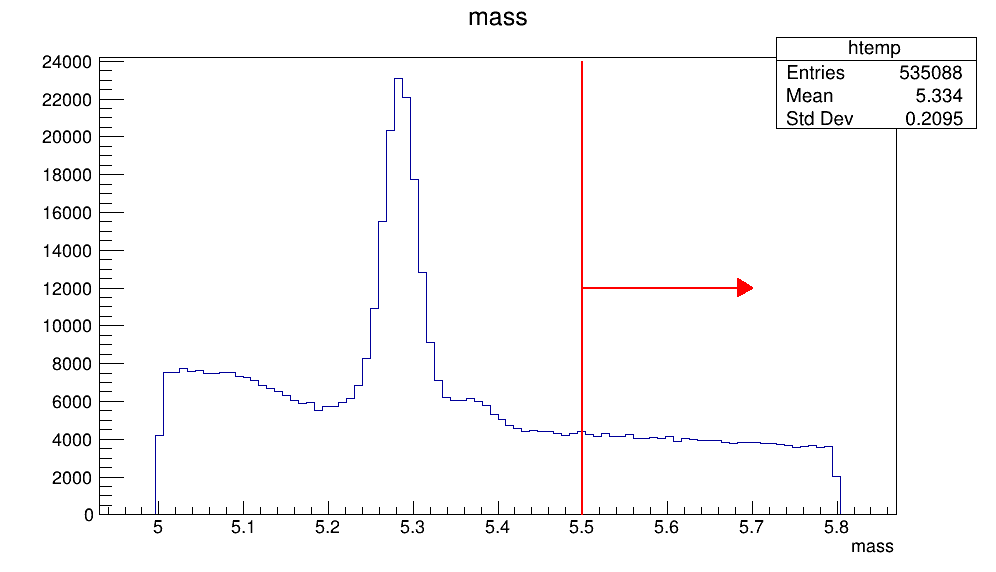

In [5]:
#Let's have a look at the mass variable in the file f
from ROOT import TFile, TCanvas, TLine, TArrow
f = TFile.Open("/content/drive/MyDrive/data.root")
t = f.Get("ntp")
fmc = TFile.Open("/content/drive/MyDrive/mc.root")
tmc = fmc.Get("ntp")

cmass = TCanvas("BmassCanvas","Canvassss",1000,600)
t.Draw("mass")

line2 = TLine(5.5, 0, 5.5, 24000)
line2.SetLineColor(2)
line2.SetLineWidth(2)
line2.Draw()
arrow2 = TArrow(5.5,12000,5.7,12000,0.02,"|>")
arrow2.SetLineColor(2)
arrow2.SetFillColor(2)
arrow2.SetLineWidth(2)
arrow2.Draw()

cmass.Draw()

In [6]:
#Open a temporary file. The option RECREATE means that if the file does not exist
#then it is created from scratch; otherwise, if it exists, it will be overwritten.
#Other possible options can be found here: https://root.cern.ch/doc/master/classTFile.html#ad0377adf2f3d88da1a1f77256a140d60
f_temp = TFile.Open("/content/drive/MyDrive/data_bkg.root","RECREATE")
#Select the file you just created
f_temp.cd()
#Copy the TTree in the data.root file in another temporary TTree. Specify your selection.
t_temp = t.CopyTree("mass>5.5")
#Write the new TTree in the new TFile. Closing the TFile will ensure that all modifications will be saved.
f_temp.Write()
f_temp.Close()

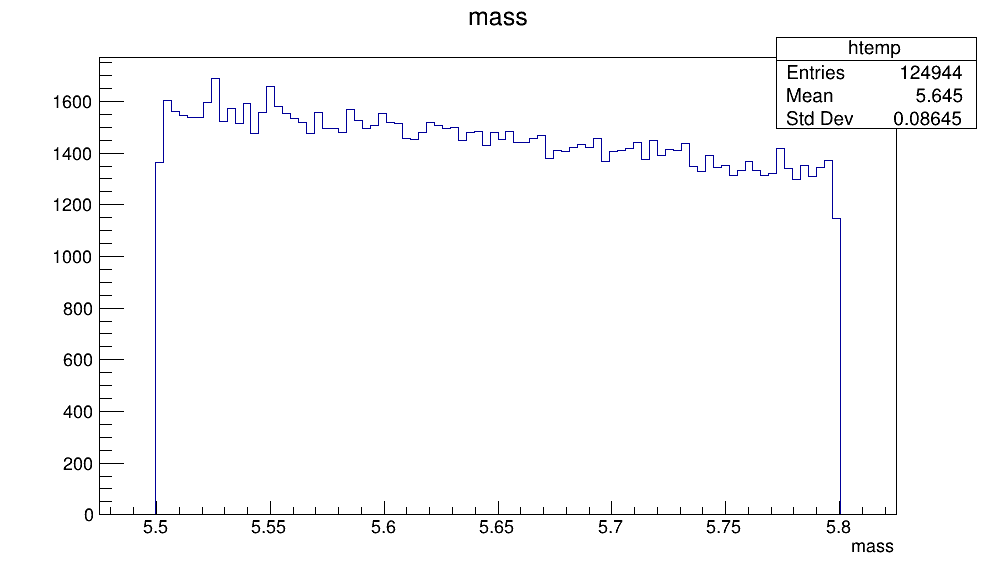

In [7]:
#Check that everything is fine: open the file and look at the mass variable
f_bkg = TFile.Open("/content/drive/MyDrive/data_bkg.root")
t_bkg = f_bkg.Get("ntp")
c_bkg = TCanvas("c_bkg","Check",1000,600)
t_bkg.Draw("mass")
c_bkg.Draw()

In [8]:
from ROOT import TMVA

help(TMVA.Types.EMVA)
#types = dir(TMVA.Types) #list all attributes of the class TMVA.Types
#list_types = [x for x in types if x[0]=="k"] #select only variables starting with "k"
#list_types
#help(TMVA.Types)

Help on class EMVA in module __main__:

class EMVA(builtins.int)
 |  Method resolution order:
 |      EMVA
 |      builtins.int
 |      builtins.object
 |  
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __cpp_name__ = 'TMVA::Types::EMVA'
 |  
 |  kBDT = 9
 |  
 |  kBayesClassifier = 14
 |  
 |  kBoost = 16
 |  
 |  kC50 = 28
 |  
 |  kCFMlpANN = 7
 |  
 |  kCategory = 20
 |  
 |  kCrossValidation = 32
 |  
 |  kCuts = 1
 |  
 |  kDL = 22
 |  
 |  kDNN = 21
 |  
 |  kDT = 10
 |  
 |  kFDA = 15
 |  
 |  kFisher = 5
 |  
 |  kHMatrix = 4
 |  
 |  kKNN = 6
 |  
 |  kLD = 18
 |  
 |  kLikelihood = 2
 |  
 |  kMLP = 13
 |  
 |  kMaxMethod = 33
 |  
 |  kPDEFoam = 17
 |  
 |  kPDERS = 3
 |  
 |  kPlugins = 19
 |  
 |  kPyAdaBoost = 24
 |  
 |  kPyGTB = 25
 |  
 |  kPyKeras = 26
 |  
 |  kPyRandomFores

sh: 1: root-config: not found
Error in <TUnixSystem::GetFromPipe>: command "root-config --has-dataframe" returned 32512


In [10]:
#Let's import the TMVA module (MultiVariateAnalysis)
from ROOT import TMVA
TMVA.Tools.Instance()
TMVA.PyMethodBase.PyInitialize()

#Create a new file for the outputs of the classifiers
output = ROOT.TFile.Open('TMVA.root', 'RECREATE')

#Initialise the TMVA factory, which will be out human-to-algorithm interface.
#On top of the name of the file you can add some options and configurations.
#You can find all info in the TMVA manual: https://root.cern.ch/download/doc/tmva/TMVAUsersGuide.pdf
factory = TMVA.Factory('TMVAClassification', output,'!V:!Silent:Color:DrawProgressBar:Transformations=I,D,G:AnalysisType=Classification')


#Initialise the DataLoader, which is needed to load the two TTrees and to specify
#which variables you want to use to train your BDT.
#In principle you can also use all the variables in your TTree, but in that case
#the algotirhm will be VERY slow and the risk of overtraining will be higher.

#Remember not to use the mass variable!

dataloader = TMVA.DataLoader('dataset')
dataloader.AddVariable("minPT")
dataloader.AddVariable("maxPT")
dataloader.AddVariable("minIPCHI2")
dataloader.AddVariable("maxIPCHI2")
dataloader.AddVariable("doca")
dataloader.AddVariable("vertexCHI2")
dataloader.AddSignalTree(tmc,1.0)
dataloader.AddBackgroundTree(t_bkg, 1.0)

#Prepare the data for the MVA. They are split in two: a training subsample and a testing subsample.
#The training sample will be use for the training and the testing will be used later.
#You can also add a common selection as a TCut.
dataloader.PrepareTrainingAndTestTree(ROOT.TCut(''), "SplitMode=Random:NormMode=NumEvents:!V" );

#Load the DataLoader in the Factory and specify which algorithms you want to use.
#You can use default options by not specifying anything in the option field or you can
#try to experiment different configurations: see the TMVA note.
#As an example, here is a BDT with some standard options, separated by ":".
factory.BookMethod(dataloader, TMVA.Types.kBDT, "BDT", "!H:!V:NTrees=200:MinNodeSize=2.5%:MaxDepth=3:BoostType=Grad:UseBaggedBoost:BaggedSampleFraction=0.5:SeparationType=GiniIndex:nCuts=20" )
factory.BookMethod(dataloader, TMVA.Types.kBDT, "BDT2", "!H:!V:NTrees=200:MinNodeSize=2.5%:MaxDepth=5:BoostType=Grad:UseBaggedBoost:BaggedSampleFraction=0.5:SeparationType=GiniIndex:nCuts=40" )
factory.BookMethod(dataloader, TMVA.Types.kFisher, "FISHER", "!H:!V:NTrees=200:MinNodeSize=2.5%:MaxDepth=3:BoostType=Grad:UseBaggedBoost:BaggedSampleFraction=0.5:SeparationType=GiniIndex:nCuts=20" )

#you can add other methods. Try a variety of them so you can check
#factory.BookMethod(dataloader, TMVA.Types.kFisher, "fisher")
#factory.BookMethod(dataloader, TMVA.Types.kSVM,"SVM")
#factory.BookMethod(dataloader, TMVA.Types.kMLP,"MLP")
#factory.BookMethod(dataloader, TMVA.Types.kKNN,"KNN")
#factory.BookMethod(dataloader, TMVA.Types.kTMlpANN,"ANN")

TypeError: none of the 3 overloaded methods succeeded. Full details:
  TMVA::MethodBase* TMVA::Factory::BookMethod(TMVA::DataLoader* loader, TString theMethodName, TString methodTitle, TString theOption = "") =>
    TypeError: could not convert argument 2
  TMVA::MethodBase* TMVA::Factory::BookMethod(TMVA::DataLoader* loader, TMVA::Types::EMVA theMethod, TString methodTitle, TString theOption = "") =>
    runtime_error: FATAL error
  TMVA::MethodBase* TMVA::Factory::BookMethod(TMVA::DataLoader*, TMVA::Types::EMVA, TString, TString, TMVA::Types::EMVA, TString) =>
    TypeError: takes at least 6 arguments (4 given)

DataSetInfo              : [dataset] : Added class "Signal"
                         : Add Tree ntp of type Signal with 238591 events
DataSetInfo              : [dataset] : Added class "Background"
                         : Add Tree ntp of type Background with 124944 events
                         : Dataset[dataset] : Class index : 0  name : Signal
                         : Dataset[dataset] : Class index : 1  name : Background
Factory                  : Booking method: BDT
                         : 
                         : the option NegWeightTreatment=InverseBoostNegWeights does not exist for BoostType=Grad
                         : --> change to new default NegWeightTreatment=Pray
                         : Rebuilding Dataset dataset
                         : Building event vectors for type 2 Signal
                         : Dataset[dataset] :  create input formulas for tree ntp
                         : Building event vectors for type 2 Background
                        

In [2]:
factory.TrainAllMethods()
factory.TestAllMethods()
factory.EvaluateAllMethods()

output.Close()

NameError: name 'factory' is not defined

In [1]:
roc = factory.GetROCCurve(dataloader)
roc.Draw()
method_list=["BDT", "BDT2"] #add in this list all the methods you trained
for m in method_list:
  AUC = factory.GetROCIntegral(dataloader,m)
  print("Method: " + m + ", AUC: " + str(AUC))

NameError: name 'factory' is not defined

In [18]:
#After executing the MVA code, a new file called TMVAClassification_BDT.weights.xml is created in the
#dataset/weights/ folder in your Drive (replace "BDT" with your favourite MVA method).
#This file contains the results of the MVA training and is used to classify the data events.
#Just like in the training, each event will be associated with a MVA output value
#according to how much the event looks like signal or background.
#
#First import the array module: this is a technical step due to how TMVA is ported in python.
from array import array
from ROOT import TMVA, TFile

f = ROOT.TFile.Open("/content/drive/MyDrive/data.root")
t = f.Get("ntp")
fmva = ROOT.TFile.Open("TMVA.root")
tmva=fmva.Get("dataset/TrainTree")

print("Creating new file with MVA results...")

#Now initialise the TMVA Reader, which can read the .xml file
reader = TMVA.Reader("!Silent")

#The next lines will match the variables used in the training with the variables
#in the TTree of the data sample.
forbiddenList=["classID", "className", "weight", "BDT2"]
br = {}

for branch in tmva.GetListOfBranches():
  branchName = branch.GetName()
  if branchName not in forbiddenList:
    if branchName=="piplusP": #there was a problem with the piplusP variable when the ntuple was created, please ignore this
      br[branchName] = array('d', [-999.])
    else:
      br[branchName] = array('f', [-999.])
    reader.AddVariable(branchName, br[branchName])
    t.SetBranchAddress(branchName, br[branchName])

#Now we need to tell the reader which MVA method and which weights file to use.
#Change the name "BDT" (also in the weights file) with the name of your classifier
reader.BookMVA("BDT2", "dataset/weights/TMVAClassification_BDT.weights.xml")

#Create the new file and the new TTree
newFile = ROOT.TFile.Open("/content/drive/MyDrive/data_for_fit.root","RECREATE")
newTree = ROOT.TTree("ntp", "ntp")

#define some variables
mass = array('f', [0.])
tag = array('i', [0])

newmass = array('f', [0.])
newtag = array('i', [0])
MVA = array('f',[0])

#Connect these variables with the ones in the TTree
t.SetBranchAddress("mass",mass)
t.SetBranchAddress("tag",tag)

#Create new branches in the new TTree with the variables we want
massbranch = newTree.Branch("mass", newmass, "mass/F")
tagbranch = newTree.Branch("tag", newtag, "tag/I")
MVAbranch = newTree.Branch("MVA", MVA, "MVA/F")

#Let's start! We loop over all the events in the TTree t and for each of them we
#fill the new tree with the variables of interest
n = t.GetEntries()
for i in range(n):
    t.GetEntry(i)
    MVA[0] = reader.EvaluateMVA("BDT2") #here the MVA is evaluated for the event i
    newmass[0] = mass[0]
    newtag[0] = tag[0]
    newTree.Fill()

print("Done!")

#finally, write the new file and close it
newFile.Write("",TFile.kOverwrite)
newFile.Close()

Creating new file with MVA results...


TypeError: TTree::SetBranchAddress must be called with a valid branch name

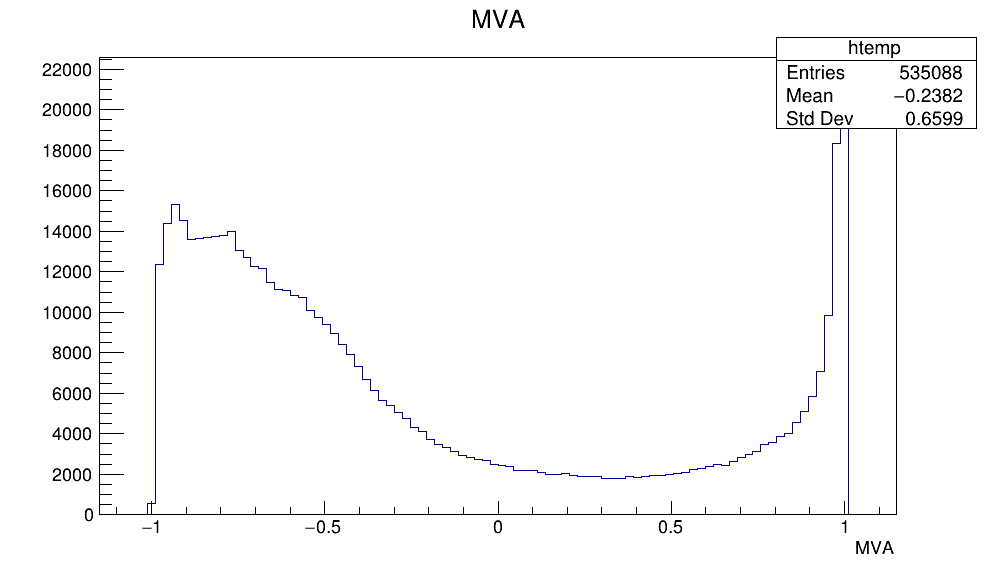

In [ ]:
j =  ROOT.TFile.Open("/content/drive/MyDrive/data_for_fit.root")
jtr = j.Get("ntp")

ccbdt = ROOT.TCanvas("ccbdt","ccbdt",1000,600)
jtr.Draw("MVA")
ccbdt.Draw()

In [ ]:
h_beforeBDT = ROOT.TH1D("h_beforeBDT","",100,5,5.8)
h_afterBDT = ROOT.TH1D("h_afterBDT","",100,5,5.8)

h_beforeBDT.SetStats(0)

t.Draw("mass>>h_beforeBDT")
jtr.Draw("mass>>h_afterBDT","MVA>0.5")

cbdt = ROOT.TCanvas("cbdt","cbdt")
h_afterBDT.SetLineColor(2)
h_beforeBDT.Draw()
h_afterBDT.Draw("same")
h_beforeBDT.GetYaxis().SetRangeUser(0,1.05*h_beforeBDT.GetMaximum())
cbdt.Draw()